In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
df=pd.read_csv('bank_marketing_part1_Data-1.csv')

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
df.shape

(210, 7)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [7]:
df.duplicated().sum()

0

C:\Users\Lakshya\AppData\Local\Temp\ipykernel_17548\2929856382.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a = sns.distplot(df[i], ax=axes[j][0])
C:\Users\Lakshya\AppData\Local\Temp\ipykernel_17548\2929856382.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a = sns.distplot(df[i], ax=axes[j][0])
C:\Users\Laksh

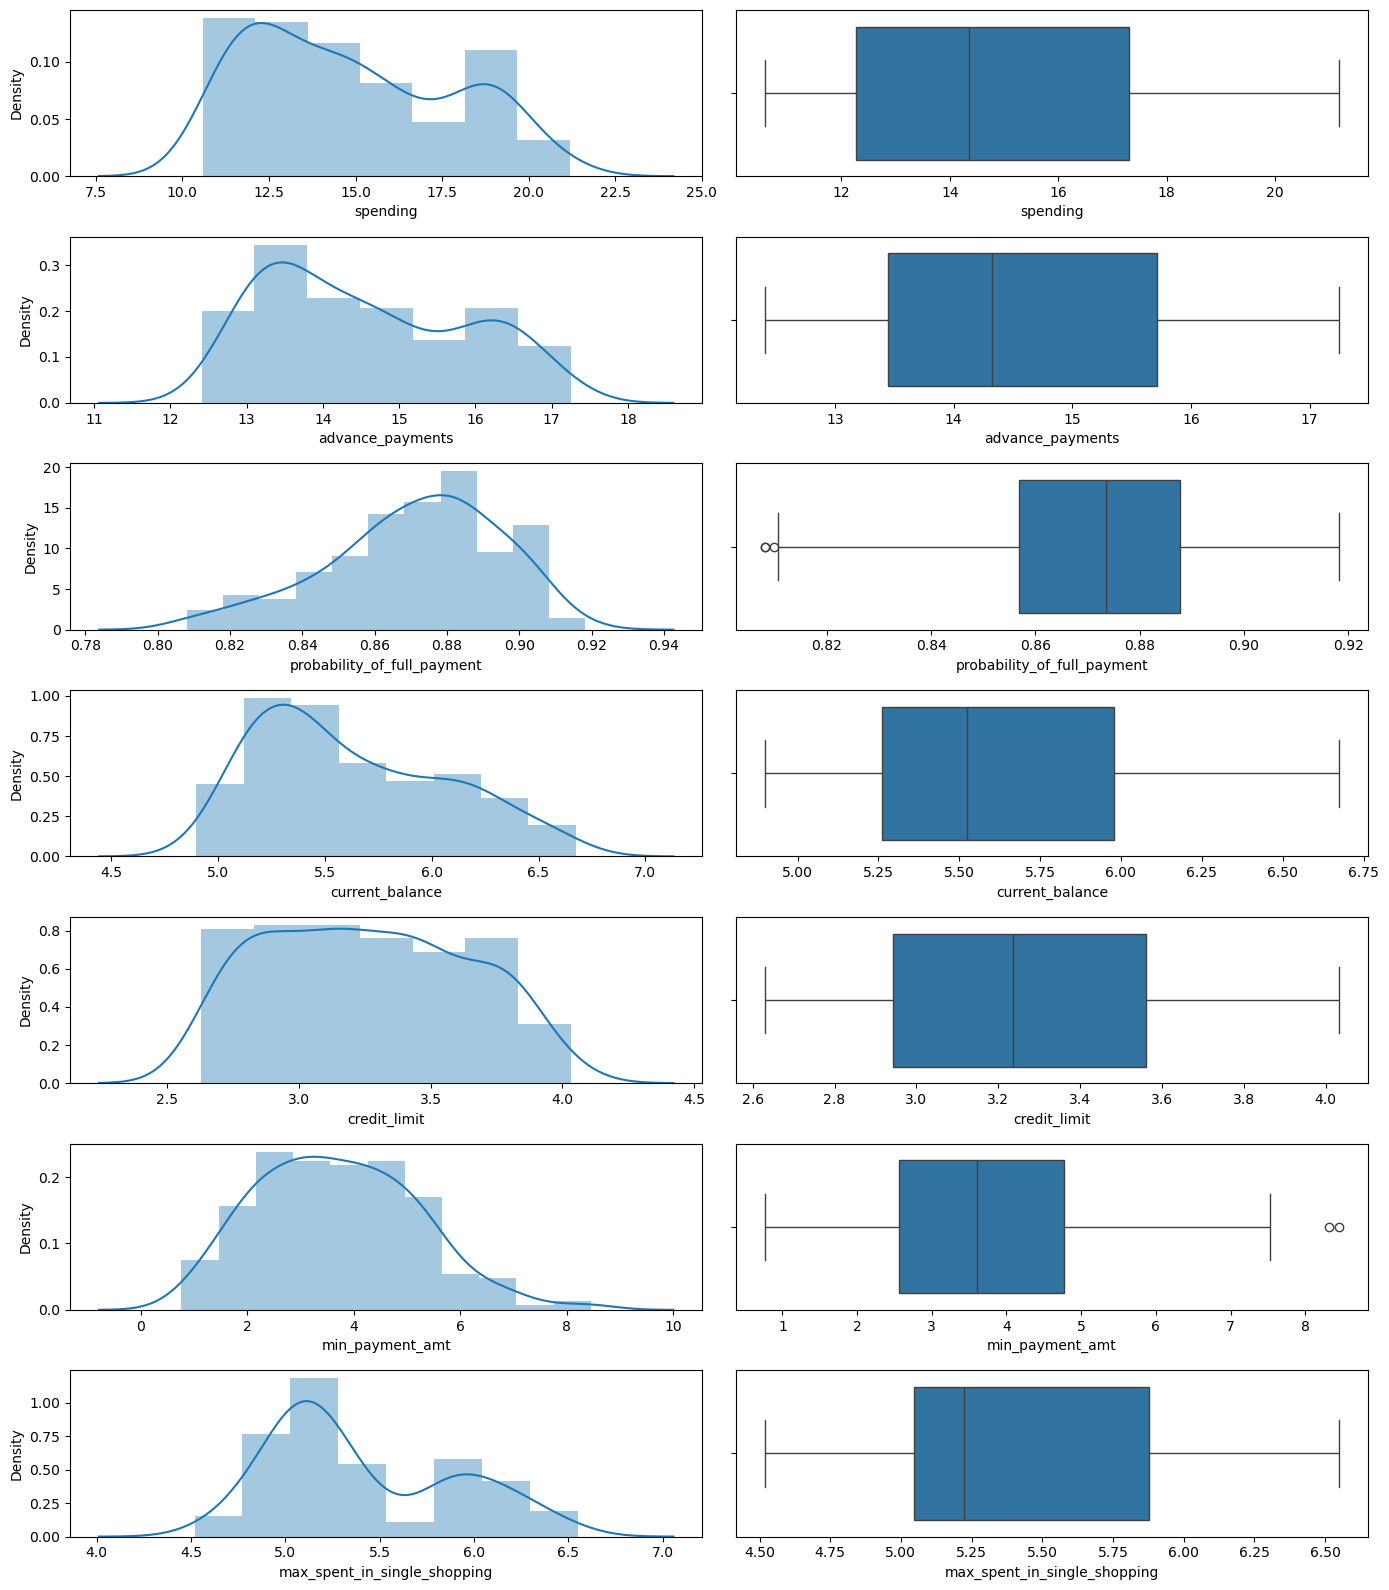

In [11]:
import seaborn as sns
fig, axes = plt.subplots(nrows=7, ncols=2)
fig.set_size_inches(14, 16)
j = 0
for i in df.columns:
    a = sns.distplot(df[i], ax=axes[j][0])
    a = sns.boxplot(df[i], orient="h", ax=axes[j][1])
    j = j + 1

fig.tight_layout(w_pad=1.0)
plt.show()


In [12]:
# there is a presence of outliersin two variables named as min_payment_amt and probability_of_full_payment

In [14]:
# Handling outliers for 'min_payment_amt'
Q1 = df['min_payment_amt'].quantile(0.25)
Q3 = df['min_payment_amt'].quantile(0.75)
IQR = Q3 - Q1
df['min_payment_amt'] = np.where(df['min_payment_amt'] < Q1 - 1.5 * IQR,
                                        Q1 - 1.5 * IQR, df['min_payment_amt'])
df['min_payment_amt'] = np.where(df['min_payment_amt'] > Q3 + 1.5 * IQR,
                                        Q3 + 1.5 * IQR, df['min_payment_amt'])




In [15]:
# Handling outliers for 'probability_of_full_payment'
Q1 = df['probability_of_full_payment'].quantile(0.25)
Q3 = df['probability_of_full_payment'].quantile(0.75)
IQR = Q3 - Q1
df['probability_of_full_payment'] = np.where(df['probability_of_full_payment'] < Q1 - 1.5 * IQR,
                                             Q1 - 1.5 * IQR, df['probability_of_full_payment'])
df['probability_of_full_payment'] = np.where(df['probability_of_full_payment'] > Q3 + 1.5 * IQR,
                                             Q3 + 1.5 * IQR, df['probability_of_full_payment'])


In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() / df.shape[0]) * 100


spending                        0.0
advance_payments                0.0
probability_of_full_payment     0.0
current_balance                 0.0
credit_limit                    0.0
min_payment_amt                 0.0
max_spent_in_single_shopping    0.0
dtype: float64

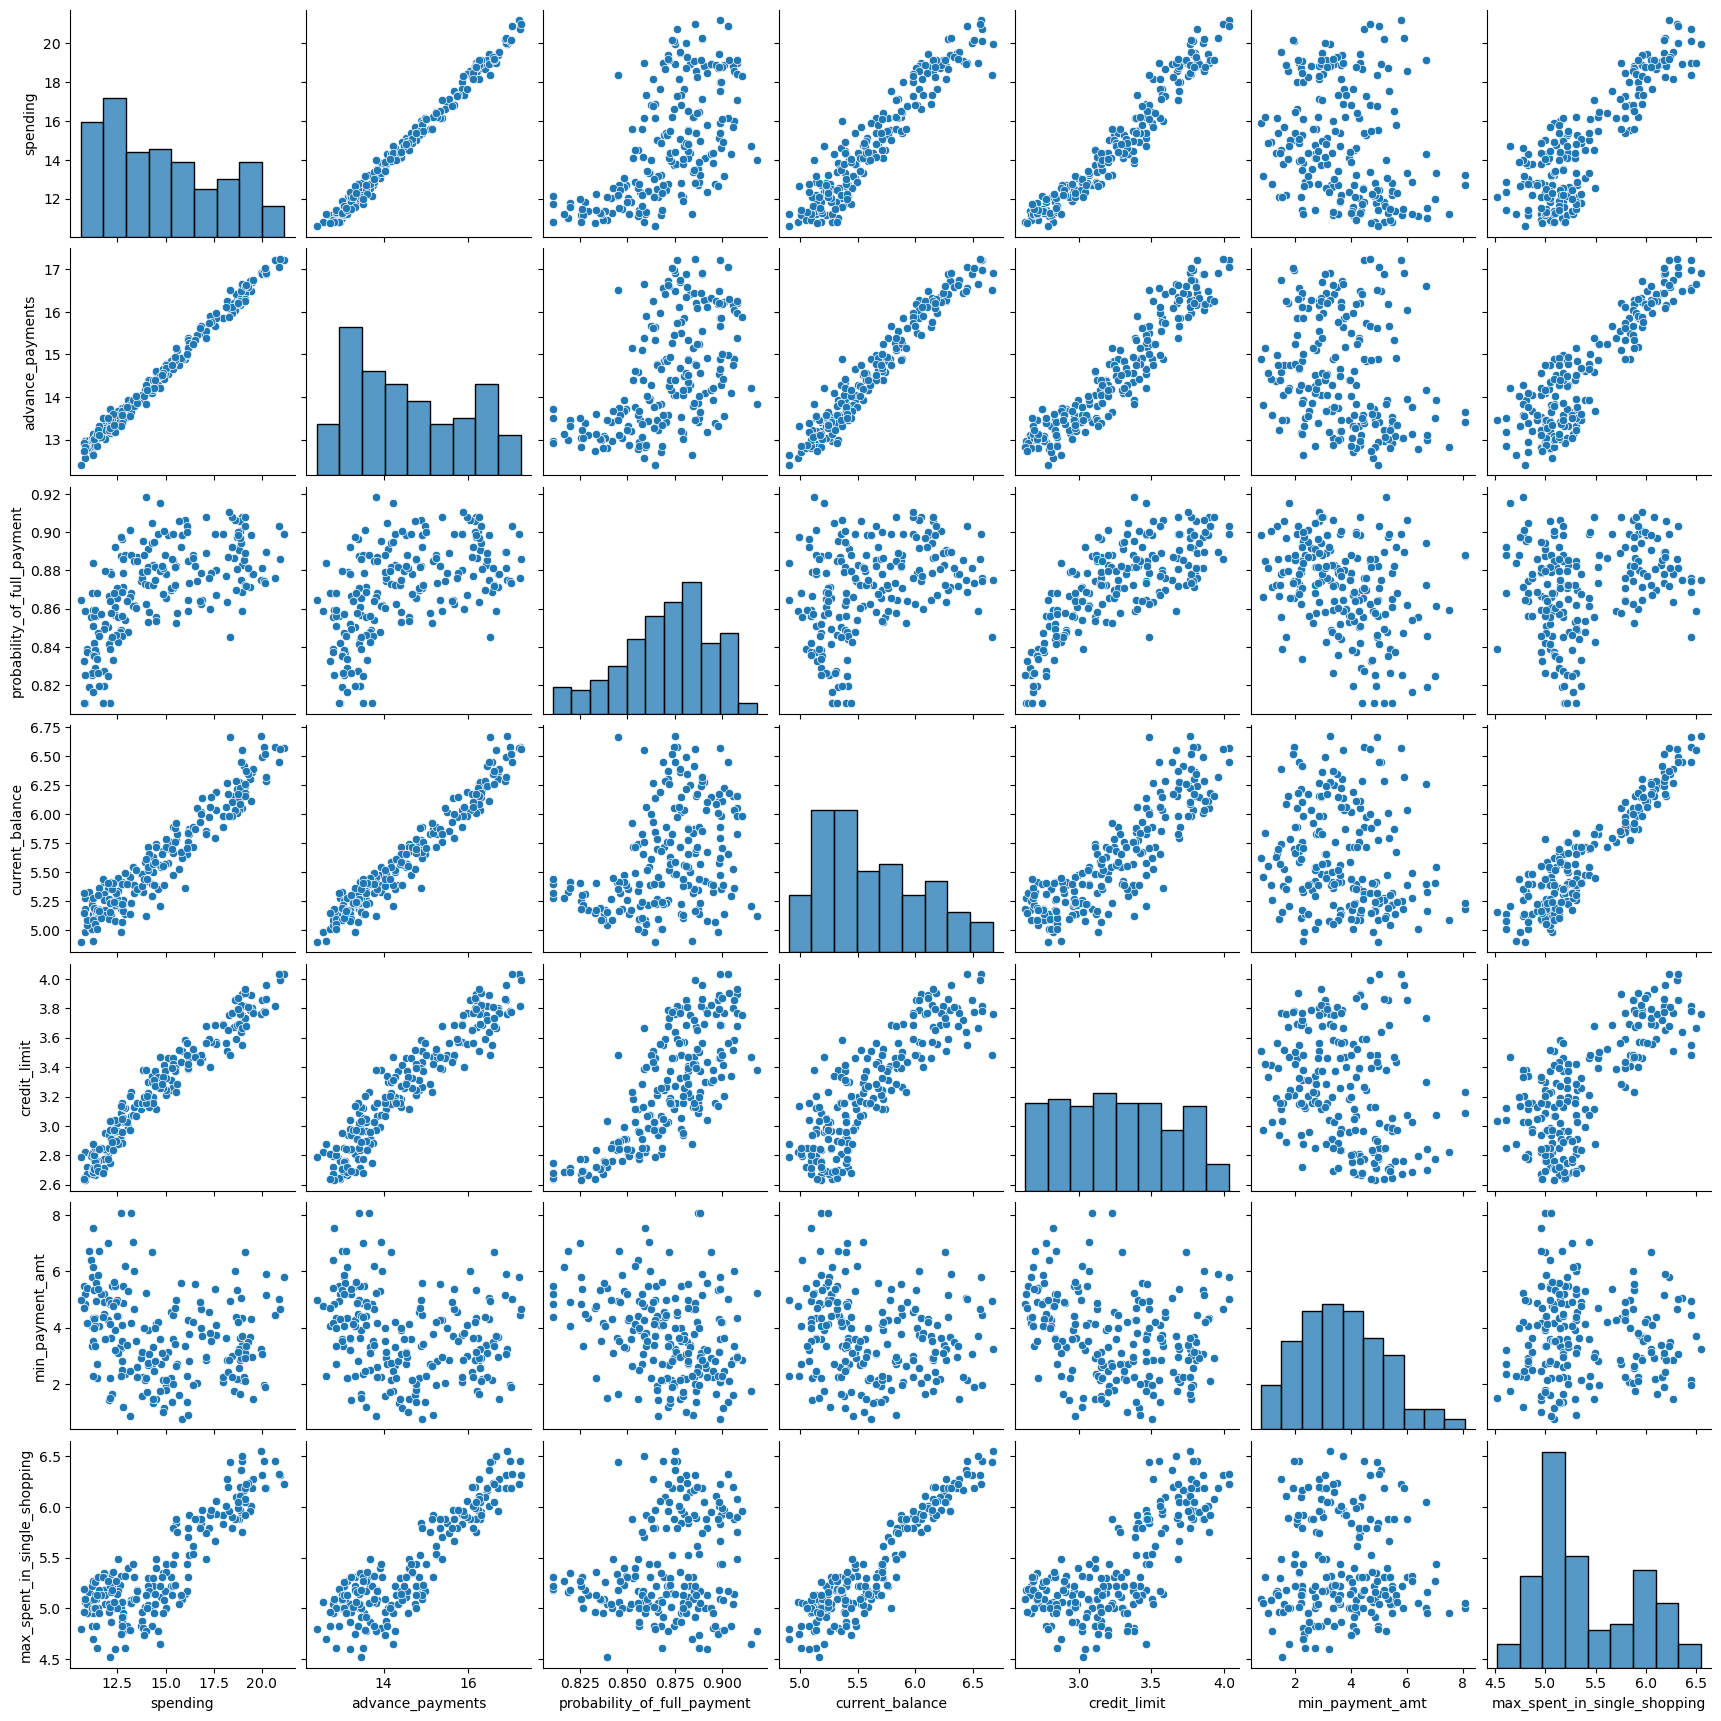

In [17]:
sns.pairplot(df)

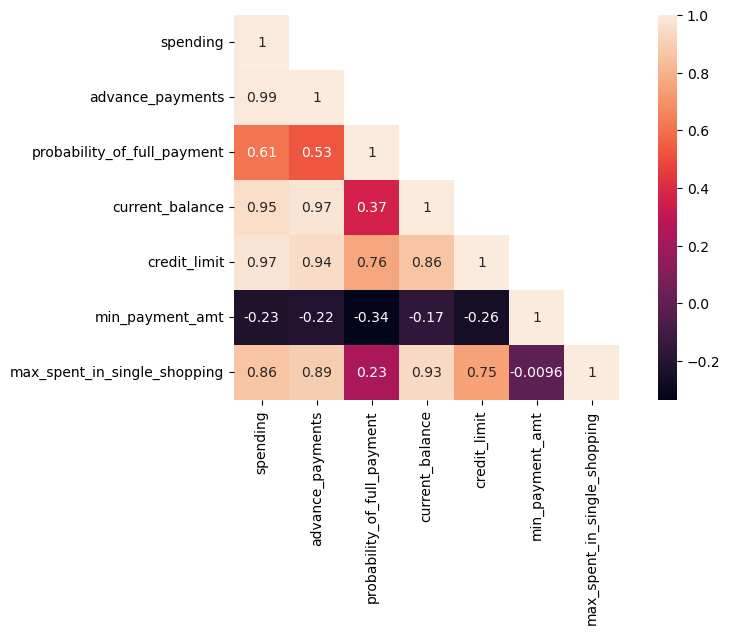

In [18]:
cor = df.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.heatmap(cor, mask=mask, vmax=1, square=True, annot=True)
plt.show()


In [19]:
min_max=MinMaxScaler()

In [20]:
df_s=pd.DataFrame(columns=df.columns,data=min_max.fit_transform(df))

In [21]:
df_s


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,0.882908,0.931818,0.599861,1.000000,0.807555,0.339995,1.000000
1,0.509915,0.512397,0.889521,0.261261,0.678546,0.351479,0.307730
2,0.789424,0.828512,0.671347,0.759572,0.801853,0.355854,0.802068
3,0.022663,0.113636,0.000000,0.213401,0.007840,0.603853,0.327917
4,0.698772,0.712810,0.822676,0.557995,0.758375,0.178125,0.648941
...,...,...,...,...,...,...,...
205,0.311615,0.332645,0.718696,0.304054,0.405560,0.440343,0.107829
206,0.583569,0.663223,0.494023,0.578829,0.575909,0.568034,0.628262
207,0.324835,0.361570,0.640710,0.303491,0.406985,0.130138,0.237322
208,0.522191,0.535124,0.830103,0.456081,0.609408,0.205741,0.454948


In [22]:
df_s.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,0.402032,0.274759,0.0,0.158640,0.355524,0.634089,1.0
advance_payments,210.0,0.444067,0.269826,0.0,0.214876,0.394628,0.682851,1.0
probability_of_full_payment,210.0,0.561101,0.218730,0.0,0.429964,0.583614,0.716607,1.0
current_balance,210.0,0.410773,0.249473,0.0,0.204533,0.351633,0.608530,1.0
credit_limit,210.0,0.448043,0.269219,0.0,0.223806,0.432644,0.664113,1.0
min_payment_amt,210.0,0.400872,0.204345,0.0,0.245594,0.387435,0.547356,1.0
max_spent_in_single_shopping,210.0,0.437751,0.241989,0.0,0.258986,0.346627,0.668636,1.0


In [23]:
#SUCCESSFULLY SCALED THE VARIABLES


In [24]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

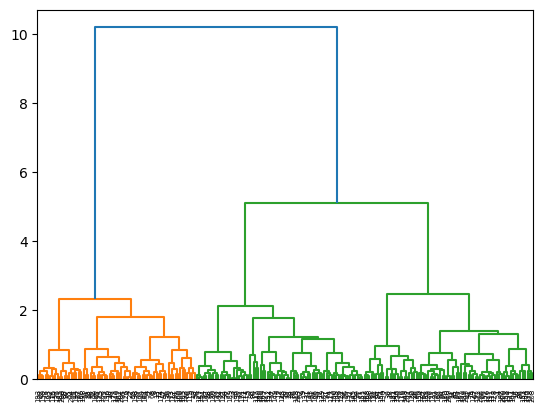

In [27]:
dend=sch.dendrogram(sch.linkage(df_s,method='ward',metric='euclidean'))

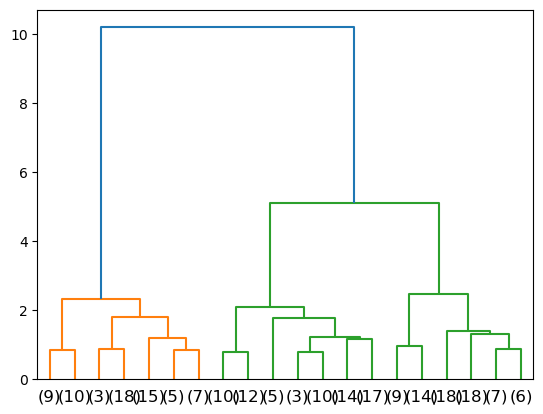

In [30]:
dend=sch.dendrogram(sch.linkage(df_s,method='ward'),p=20,truncate_mode='lastp')

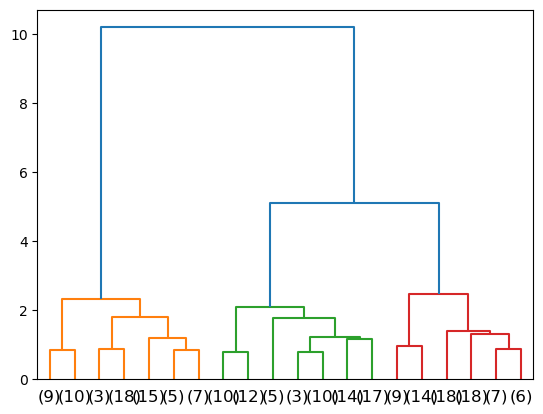

In [31]:
dend=sch.dendrogram(sch.linkage(df_s,method='ward'),p=20,truncate_mode='lastp',color_threshold=4)

In [32]:
#2 clusters are not optimal for the business and we will use 3 clusters


In [34]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
sil_scores = {}  # Dictionary to store silhouette score and cluster sizes

for i in range(2, 10):  # Testing cluster sizes from 2 to 9
    model = AgglomerativeClustering(n_clusters=i,  linkage='ward')
    model.fit(df_s)  # Using scaled data
    labels = model.labels_
    
    sil_score = silhouette_score(df_s, labels, metric='euclidean', random_state=100).round(2)
    cluster_distribution = np.unique(labels, return_counts=True)[1]  # Get counts of each cluster
    
    sil_scores[i] = (sil_score, cluster_distribution)

# Display as DataFrame
pd.DataFrame(sil_scores, index=['Silh_Scores', 'Cluster Distribution']).T

,Silh_Scores,Cluster Distribution
2,0.49,"[143, 67]"
3,0.39,"[72, 67, 71]"
4,0.3,"[67, 49, 71, 23]"
5,0.25,"[71, 49, 48, 23, 19]"
6,0.22,"[48, 49, 49, 23, 19, 22]"
7,0.22,"[49, 49, 27, 23, 19, 22, 21]"
8,0.23,"[49, 44, 27, 23, 19, 22, 21, 5]"
9,0.22,"[31, 44, 27, 23, 19, 22, 21, 5, 18]"


In [38]:
from sklearn.cluster import KMeans

In [43]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df_s)

C:\Users\Lakshya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [46]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [48]:
k_means.inertia_

35.86521074048987

In [49]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_s)
k_means.inertia_

C:\Users\Lakshya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


22.774663529681014

In [50]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_s)
k_means.inertia_

C:\Users\Lakshya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


19.44677836696754

In [52]:
wss=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_s)
    wss.append(KM.inertia_)

C:\Users\Lakshya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lakshya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lakshya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lakshya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

In [53]:
wss

[90.11520380592978,
 35.86521074048987,
 22.770013026036562,
 19.42283841413585,
 18.321862173029942,
 16.169557667733603,
 14.74349541942087,
 12.62166376558715,
 12.154298941725951,
 10.73822632439637]

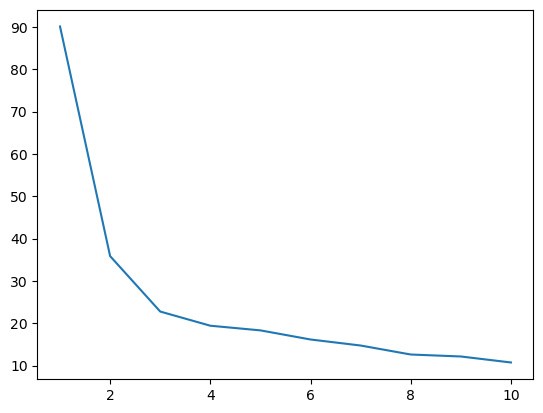

In [54]:
plt.plot(range(1,11), wss)

In [ ]:
# from the above wss plot we can see that we can take 

In [55]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_s)
labels = k_means.labels_

C:\Users\Lakshya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [58]:
df["Clusters"] = labels
df.head(5)
df.drop('Clus_kmeans',axis=1,inplace=True)

In [59]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,2


In [60]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [61]:
silhouette_score(df_s,labels)

0.41888372435617

In [62]:
sil_width = silhouette_samples(df_s,labels)

In [64]:
df_s["sil_width"] = sil_width
df_s.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width
0,0.882908,0.931818,0.599861,1.000000,0.807555,0.339995,1.000000,0.591548
1,0.509915,0.512397,0.889521,0.261261,0.678546,0.351479,0.307730,0.414104
2,0.789424,0.828512,0.671347,0.759572,0.801853,0.355854,0.802068,0.660962
3,0.022663,0.113636,0.000000,0.213401,0.007840,0.603853,0.327917,0.523820
4,0.698772,0.712810,0.822676,0.557995,0.758375,0.178125,0.648941,0.391219


In [65]:
silhouette_samples(df_s,labels).min()

-0.10140150928269959

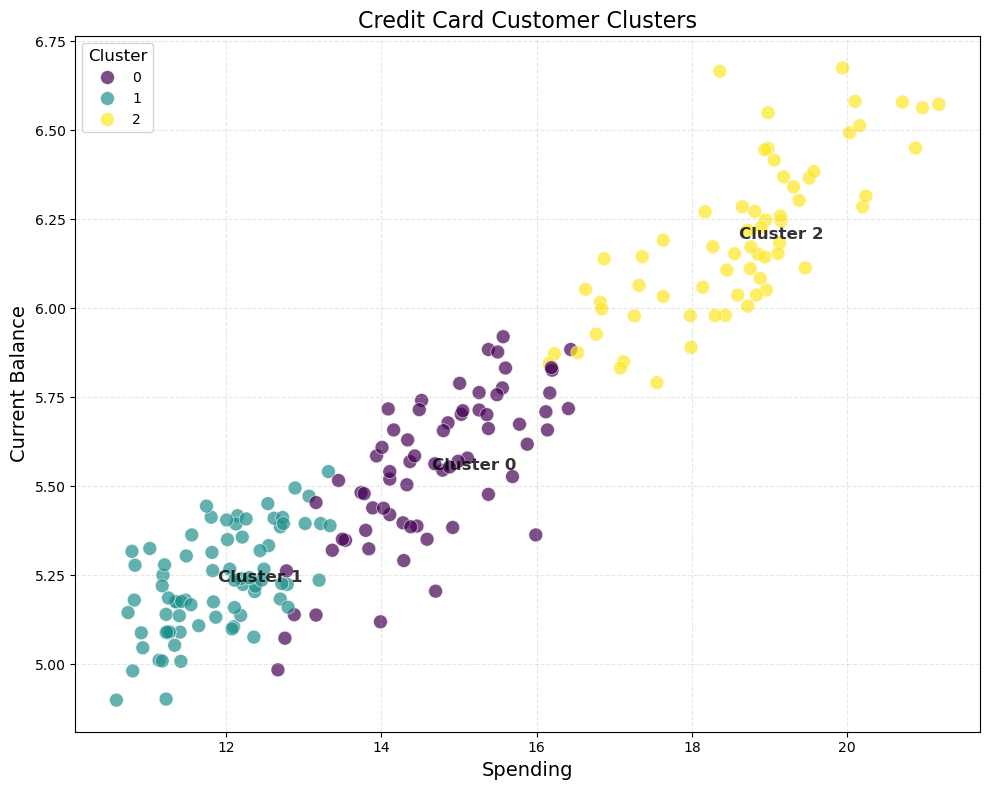

In [68]:
# Creating a scatter plot of spending vs current_balance colored by clusters
plt.figure(figsize=(10, 8))

# Create scatter plot
sns.scatterplot(
    data=df,
    x='spending',
    y='current_balance',
    hue='Clusters',
    palette='viridis',  # Color palette for different clusters
    s=100,              # Point size
    alpha=0.7,          # Transparency
    edgecolor='white',  # White edge around points
    linewidth=0.5       # Edge line width
)

# Customize the plot
plt.title('Credit Card Customer Clusters', fontsize=16)
plt.xlabel('Spending', fontsize=14)
plt.ylabel('Current Balance', fontsize=14)
plt.legend(title='Cluster', title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Add annotations for cluster centers (optional)
for cluster in df['Clusters'].unique():
    cluster_data = df[df['Clusters'] == cluster]
    center_x = cluster_data['spending'].mean()
    center_y = cluster_data['current_balance'].mean()
    plt.annotate(f'Cluster {cluster}', 
                (center_x, center_y),
                fontsize=12,
                fontweight='bold',
                alpha=0.8)

plt.tight_layout()
plt.show()